# MIE451/1513 Decision Support System -- Data Science Solution

## Be sure to let us know:
i. what location you chose (and remember to sign up on Piazza so there are no duplicates),

154982 (Brampton, ON)

ii. what preprocessing steps you implemented


In [1]:
# check the current python version
import sys
print(sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In [2]:
import os
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

## Data Visualization
import folium
from tabulate import tabulate
from scipy.stats.kde import gaussian_kde

## Geolocation
import geopy
from geopy.geocoders import Photon
from geopy.extra.rate_limiter import RateLimiter

nltk.download("stopwords")

import warnings
# Kill warning
warnings.simplefilter("ignore")
print(os.path.abspath('.'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\huang\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\huang\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\huang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\huang\AppData\Local\Temp\ipykernel_25104\1017884177.py:46: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  from scipy.stats.kde import gaussian_kde


e:\OneDrive - University of Toronto\U of T\2 2023 Winter\MIE1513 Decision Support Systems\Projects\Project Data Science\assignment-ds-SimonHuang135


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load data

In [3]:
hotelDf = pd.read_csv('trip-advisor-crawler/reviews.csv')
hotelDf.columns = ['filePath','hotelName','reviewColumn','ratingScore','groundTruth',
                    'date_stamp','streetAddress', 'City',
                    'Province','postalCode']
hotelDf

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode
0,data\ca\154982\10838976\438195618.html,Newton Villa,"""I came across this place by chance and booked...",5,positive,"November 17, 2016",8 Merrydale Court,"('Brampton',)",Ontario,L6P 0H4
1,data\ca\154982\10838976\440367374.html,Newton Villa,"""Welcomed us very last minute, very nice and c...",5,positive,"November 27, 2016",8 Merrydale Court,"('Brampton',)",Ontario,L6P 0H4
2,data\ca\154982\10838976\458038819.html,Newton Villa,"""We booked in to Newton Villa on Sunday and wa...",5,positive,"February 8, 2017",8 Merrydale Court,"('Brampton',)",Ontario,L6P 0H4
3,data\ca\154982\10838976\467363088.html,Newton Villa,"""This place is very nice and clean. I can't sa...",5,positive,"March 14, 2017",8 Merrydale Court,"('Brampton',)",Ontario,L6P 0H4
4,data\ca\154982\10838976\482788875.html,Newton Villa,"""I have stayed in Newton Villa with my Kids.\n...",5,positive,"May 8, 2017",8 Merrydale Court,"('Brampton',)",Ontario,L6P 0H4
...,...,...,...,...,...,...,...,...,...,...
3643,data\ca\154982\631827\83797961.html,"Holiday Inn Express &amp; Suites Brampton, an ...","""We stayed one night at this hotel for a Weddi...",5,positive,"October 17, 2010",10 Nevets Rd,"('Brampton',)",Ontario,L6T 5T2
3644,data\ca\154982\631827\853410049.html,"Holiday Inn Express &amp; Suites Brampton, an ...","""The hotel is decent. Nothing too exciting. Fa...",3,negative,"August 11, 2022",10 Nevets Rd,"('Brampton',)",Ontario,L6T 5T2
3645,data\ca\154982\631827\855366245.html,"Holiday Inn Express &amp; Suites Brampton, an ...","""Thank you so much to Jasprit, Mohinder, Omar,...",5,positive,"August 21, 2022",10 Nevets Rd,"('Brampton',)",Ontario,L6T 5T2
3646,data\ca\154982\631827\859972050.html,"Holiday Inn Express &amp; Suites Brampton, an ...","""I had a great stay. the suit was perfect, che...",5,positive,"September 13, 2022",10 Nevets Rd,"('Brampton',)",Ontario,L6T 5T2


- Check unique hotel name 

In [4]:
hotelDf['hotelName'].unique()

array(['Newton Villa', 'Park Inn by Radisson Brampton, ON',
       'Home2 Suites by Hilton Toronto Brampton',
       'Days Inn by Wyndham Brampton',
       'Hilton Garden Inn Toronto Brampton West',
       'Quality Inn &amp; Suites', 'Hilton Garden Inn Toronto / Brampton',
       'Hyatt Place Toronto/Brampton', 'Motel 6 Brampton, On - Toronto',
       'The Marigold Hotel', 'Monte Carlo Inn - Brampton Suites',
       'Hampton Inn by Hilton Brampton Toronto',
       'Residence &amp; Conference Centre - Brampton',
       'Fairfield Inn &amp; Suites Toronto Brampton',
       'Courtyard by Marriott Toronto Brampton', 'Indian Line Campground',
       'Holiday Inn Express &amp; Suites Brampton, an IHG Hotel'],
      dtype=object)

In [5]:
len(hotelDf['hotelName'].unique())

17

- Check review column

In [6]:
hotelDf['reviewColumn'].isnull().sum()

0

- Use vader to evaluated sentiment of reviews

In [7]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [8]:
reviews = hotelDf['reviewColumn'].values

In [9]:
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])

100%|██████████| 3648/3648 [00:01<00:00, 1976.49it/s]


In [10]:
reviewDF.head()

,reviewCol,vader
0,"""I came across this place by chance and booked...",0.9823
1,"""Welcomed us very last minute, very nice and c...",0.9852
2,"""We booked in to Newton Villa on Sunday and wa...",0.9478
3,"""This place is very nice and clean. I can't sa...",0.9671
4,"""I have stayed in Newton Villa with my Kids.\n...",0.9183


# Pre-Processing

- Find Top-K words (you will need to do some preprocessing in the assignment)
- Build a dataframe with one-hot encoding for words present in each review

In [11]:
def get_stop_words():
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    return stop

def getTopKWords(df, kwords):

    stop = get_stop_words()
    counter = Counter()

    reviews = df['reviewCol'].values

    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewCol'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf


In [12]:
topk = getTopKWords(reviewDF, 500)
finaldf = dataFrameTransformation(hotelDf, reviewDF, topk)

In [13]:
finaldf.head()

,hotelName,ratingScore,groundTruth,reviewCol,vader,clean,breakfast,good,great,would,...,delicious,nit,closed,review,monte,beyond,surprised,inside,seems,meeting
0,Newton Villa,5,positive,"""I came across this place by chance and booked...",0.9823,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Newton Villa,5,positive,"""Welcomed us very last minute, very nice and c...",0.9852,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Newton Villa,5,positive,"""We booked in to Newton Villa on Sunday and wa...",0.9478,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Newton Villa,5,positive,"""This place is very nice and clean. I can't sa...",0.9671,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Newton Villa,5,positive,"""I have stayed in Newton Villa with my Kids.\n...",0.9183,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Q1 Sentiment Analysis and Aggregation

## (a) Compute average Vader sentiment and average ground truth rating per hotel.

In [14]:
mean_rating = finaldf[['hotelName','ratingScore','vader']].groupby('hotelName').mean()
mean_rating.head()

,ratingScore,vader
hotelName,,
Courtyard by Marriott Toronto Brampton,3.981651,0.718041
Days Inn by Wyndham Brampton,3.590551,0.526215
Fairfield Inn &amp; Suites Toronto Brampton,3.840237,0.669936
Hampton Inn by Hilton Brampton Toronto,4.579341,0.815244
Hilton Garden Inn Toronto / Brampton,4.280977,0.762195


## (b) Rank hotels

### (i) Rank hotels by Average Ground Truth Sentiment

In [15]:
hotel_rk_rating_score = []
for hotel_name in hotelDf['hotelName'].unique():
    mean_ratingscore = finaldf.loc[finaldf['hotelName'] == hotel_name].ratingScore.mean()
    hotel_rk_rating_score.append([hotel_name, mean_ratingscore])
    
hotel_rk_rating_score_df = pd.DataFrame(hotel_rk_rating_score)
hotel_rk_rating_score_df.columns=['hotelName','mean_rating_score']
hotel_rk_rating_score_df = hotel_rk_rating_score_df.sort_values('mean_rating_score', ascending=0)

In [16]:
# top 5
hotel_rk_rating_score_df.head()

,hotelName,mean_rating_score
0,Newton Villa,4.988506
11,Hampton Inn by Hilton Brampton Toronto,4.579341
7,Hyatt Place Toronto/Brampton,4.482143
6,Hilton Garden Inn Toronto / Brampton,4.280977
4,Hilton Garden Inn Toronto Brampton West,4.107692


In [17]:
# bottom 5
hotel_rk_rating_score_df.tail()

,hotelName,mean_rating_score
5,Quality Inn &amp; Suites,3.170854
1,"Park Inn by Radisson Brampton, ON",3.100000
15,Indian Line Campground,2.902439
9,The Marigold Hotel,2.392045
8,"Motel 6 Brampton, On - Toronto",2.241379


### (ii) Rank hotels by Average Vader Compound Sentiment Score

In [18]:
hotel_rk_vader = []
for hotel_name in hotelDf['hotelName'].unique():
    mean_vader = finaldf.loc[finaldf['hotelName'] == hotel_name].vader.mean()
    hotel_rk_vader.append([hotel_name, mean_vader])
    
hotel_rk_vader_df = pd.DataFrame(hotel_rk_vader)
hotel_rk_vader_df.columns=['hotelName','vader']
hotel_rk_vader_df = hotel_rk_vader_df.sort_values('vader', ascending=0)

In [19]:
# top 5
hotel_rk_vader_df.head()

,hotelName,vader
0,Newton Villa,0.940611
7,Hyatt Place Toronto/Brampton,0.844682
11,Hampton Inn by Hilton Brampton Toronto,0.815244
6,Hilton Garden Inn Toronto / Brampton,0.762195
14,Courtyard by Marriott Toronto Brampton,0.718041


In [20]:
# bottom 5
hotel_rk_vader_df.tail()

,hotelName,vader
5,Quality Inn &amp; Suites,0.483882
15,Indian Line Campground,0.264022
1,"Park Inn by Radisson Brampton, ON",0.254412
9,The Marigold Hotel,0.120568
8,"Motel 6 Brampton, On - Toronto",0.110446


for the top 5: the top 1 is 'Newton Villa', and the the rest 4 are almost same, the ground true shows that 'Hilton Garden Inn Toronto Brampton West' can be rank within top5, but vader shows that 'Courtyard by Marriott Toronto Brampton' are better than 'Hilton Garden Inn Toronto Brampton West'

for bottom 5: the 5 ranks are same but the order is slightlt different.

# Q2 Frequency Analysis

## (a) Use term frequency of the words for (i) positive reviews and (ii) negative with ground truth sentiment to rank the top-50 most frequent non-stopwords in the review collection. Which words appear to be location specific? What words appear in both positive and negative reviews? Do any words that appear in both lists surprise you?

In [21]:
def getTopK(df, kwords, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    stop = get_stop_words()
    counter = Counter()
    reviews = df.loc[operation(df[label_column],label_value)][value_column]
    for review in reviews:
          counter.update([word.lower() 
                          for word 
                          in re.findall(r'\w+', review) 
                          if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

In [22]:
itemAnalysisDf = finaldf[['reviewCol','groundTruth','vader']]

### (i) Use term frequency of the words for positive reviews with ground truth sentiment to rank the top-50 most frequent non-stopwords in the review collection.

In [23]:
topkGroundPos = getTopK(itemAnalysisDf, 50, 'positive') 
topkGroundPos

[('clean', 1699),
 ('breakfast', 1525),
 ('great', 1322),
 ('good', 1260),
 ('nice', 971),
 ('friendly', 899),
 ('would', 888),
 ('stayed', 764),
 ('comfortable', 718),
 ('area', 710),
 ('well', 685),
 ('location', 564),
 ('pool', 540),
 ('service', 537),
 ('helpful', 533),
 ('one', 503),
 ('brampton', 499),
 ('desk', 489),
 ('time', 483),
 ('place', 474),
 ('also', 470),
 ('front', 456),
 ('recommend', 444),
 ('night', 429),
 ('check', 425),
 ('nthe', 418),
 ('bed', 406),
 ('close', 403),
 ('airport', 403),
 ('free', 398),
 ('excellent', 384),
 ('get', 383),
 ('inn', 381),
 ('always', 376),
 ('really', 370),
 ('food', 361),
 ('parking', 355),
 ('back', 352),
 ('like', 339),
 ('definitely', 339),
 ('toronto', 337),
 ('quiet', 330),
 ('family', 325),
 ('business', 316),
 ('next', 301),
 ('new', 293),
 ('day', 292),
 ('could', 284),
 ('everything', 280),
 ('beds', 276)]

### (ii) Use term frequency of the words for negative with ground truth sentiment to rank the top-50 most frequent non-stopwords in the review collection.

In [24]:
topkGroundNeg = getTopK(itemAnalysisDf, 50, 'negative')
topkGroundNeg

[('would', 563),
 ('breakfast', 491),
 ('desk', 459),
 ('night', 430),
 ('front', 414),
 ('one', 406),
 ('clean', 404),
 ('good', 353),
 ('bed', 309),
 ('get', 308),
 ('stayed', 297),
 ('like', 275),
 ('time', 272),
 ('check', 258),
 ('back', 258),
 ('could', 256),
 ('told', 255),
 ('nthe', 232),
 ('people', 227),
 ('nice', 227),
 ('even', 223),
 ('day', 221),
 ('place', 220),
 ('service', 214),
 ('area', 203),
 ('bathroom', 194),
 ('floor', 193),
 ('also', 192),
 ('never', 191),
 ('got', 188),
 ('said', 188),
 ('dirty', 174),
 ('u2019t', 173),
 ('two', 171),
 ('booked', 169),
 ('called', 167),
 ('went', 164),
 ('well', 164),
 ('really', 162),
 ('first', 161),
 ('manager', 159),
 ('next', 156),
 ('morning', 153),
 ('asked', 153),
 ('work', 152),
 ('bad', 148),
 ('location', 147),
 ('door', 146),
 ('nothing', 140),
 ('friendly', 139)]

The most common word of positive reviews are similar to that of negative, such as 'clean', 'breakfast', etc. The noun phrase I didnt expect to see are 'good', 'like', etc. This might be they provide more information on the use-frequency of the word.

### (b) Repeat this analysis for the top-50 noun phrases (using the provided grammar pattern below). Do any noun phrases appear in both positive and negative reviews? Identify a noun phrase you did not expect to see in the positive reviews and explain why it may be there.

In [25]:
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

In [26]:
# to make the results more useable, we clean up the tree results shown above. 
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):
      
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [27]:
tagger = PerceptronTagger()
pos_tag = tagger.tag

chunker = nltk.RegexpParser(grammar)

In [28]:
def getTopKNP(df, kNPs):

    counter = Counter()
    reviews = df['reviewCol'].values

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(kNPs)
    return topk

def NPdataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewCol'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf


In [29]:
topk_phrase = getTopKNP(finaldf, 50) 

In [30]:
finaldf_phrase = NPdataFrameTransformation(hotelDf, reviewDF, topk_phrase)
finaldf_phrase.head()

,hotelName,ratingScore,groundTruth,reviewCol,vader,front desk,park lot,hampton inn,hot tub,complimentari breakfast,...,good experi,toronto area,clean bed,great experi,good place,pearson airport,good breakfast,easi access,free park,good size
0,Newton Villa,5,positive,"""I came across this place by chance and booked...",0.9823,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Newton Villa,5,positive,"""Welcomed us very last minute, very nice and c...",0.9852,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Newton Villa,5,positive,"""We booked in to Newton Villa on Sunday and wa...",0.9478,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Newton Villa,5,positive,"""This place is very nice and clean. I can't sa...",0.9671,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Newton Villa,5,positive,"""I have stayed in Newton Villa with my Kids.\n...",0.9183,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
def NPgetTopK(df, kwords, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    counter = Counter()
    reviews = df.loc[operation(df[label_column], label_value)][value_column]
    for review in reviews:
        counter.update(flatten_phrase_lists([word for word in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review))))]))
    topk = counter.most_common(kwords)
    return topk

In [32]:
NP_itemAnalysisDf = finaldf_phrase[['reviewCol','groundTruth','vader']]

In [33]:
NP_topkGroundPos = NPgetTopK(NP_itemAnalysisDf, 50, 'positive')
NP_topkGroundPos

[('front desk', 231),
 ('hampton inn', 87),
 ('park lot', 79),
 ('complimentari breakfast', 64),
 ('tim horton', 63),
 ('hot tub', 57),
 ('great place', 53),
 ('next time', 45),
 ('continent breakfast', 43),
 ('hilton garden inn', 40),
 ('free breakfast', 39),
 ('good valu', 38),
 ('first time', 37),
 ('breakfast buffet', 37),
 ('busi trip', 37),
 ('newton villa', 36),
 ('breakfast area', 33),
 ('pool area', 31),
 ('industri area', 31),
 ('great locat', 30),
 ('next morn', 29),
 ('great valu', 29),
 ('minut drive', 29),
 ('comfort bed', 28),
 ('day inn', 27),
 ('good locat', 27),
 ('great servic', 26),
 ('next day', 26),
 ('downtown toronto', 26),
 ('great experi', 25),
 ('custom servic', 25),
 ('toronto area', 25),
 ('busi travel', 24),
 ('good breakfast', 23),
 ('coffe maker', 23),
 ('clean bed', 23),
 ('easi access', 23),
 ('fairfield inn', 23),
 ('pearson airport', 22),
 ('good size', 22),
 ('free park', 22),
 ('good experi', 20),
 ('toronto airport', 20),
 ('queen bed', 20),
 ('go

In [34]:
NP_topkGroundNeg = NPgetTopK(NP_itemAnalysisDf, 50, 'negative')
NP_topkGroundNeg

[('front desk', 214),
 ('custom servic', 38),
 ('next day', 38),
 ('credit card', 31),
 ('park lot', 30),
 ('continent breakfast', 29),
 ('free breakfast', 26),
 ('next morn', 24),
 ('hot tub', 19),
 ('second day', 18),
 ('air condition', 18),
 ('non smoke', 18),
 ('breakfast area', 18),
 ('hot water', 17),
 ('king bed', 16),
 ('first night', 15),
 ('bathroom door', 15),
 ('first time', 15),
 ('coffe maker', 15),
 ('second floor', 13),
 ('industri area', 13),
 ('bed bug', 13),
 ('holiday inn', 13),
 ('queen bed', 12),
 ('second night', 11),
 ('sever time', 11),
 ('day inn', 11),
 ('howard johnson', 11),
 ('front desk clerk', 11),
 ('mini fridg', 11),
 ('gener manag', 11),
 ('complimentari breakfast', 10),
 ('toilet seat', 9),
 ('clean towel', 9),
 ('second time', 9),
 ('good thing', 9),
 ('next time', 9),
 ('ice machin', 9),
 ('busi travel', 9),
 ('desk clerk', 9),
 ('bad experi', 8),
 ('big deal', 8),
 ('young ladi', 8),
 ('alarm clock', 8),
 ('first floor', 8),
 ('best western', 8),


Some phrases still exist in both lists, but better than (a). 'free breakfast', 'good locat', etc. are not expected in negative list.

## (c) Define a grammar for a phrase pattern (different from the one already provided) that you think would be helpful for review analysis. Note at least 3 observations on the similarities or differences between these noun phrases and those in Q2(b). Which pattern do you think is more effective for sentiment analysis and why?

In [35]:
grammar = r"""
    NP: {<DT|PRP\$>?<JJ>*<NN.*>+}  # Matches noun phrases with optional determiner, zero or more adjectives, and one or more nouns. like " beatiful hotel"
"""

In [36]:
tagger = PerceptronTagger()
pos_tag = tagger.tag

chunker = nltk.RegexpParser(grammar)

In [37]:
topk_phrase = getTopKNP(finaldf, 50) 

In [38]:
finaldf_phrase = NPdataFrameTransformation(hotelDf, reviewDF, topk_phrase)
finaldf_phrase.head()

,hotelName,ratingScore,groundTruth,reviewCol,vader,front desk,park lot,hampton inn,complimentari breakfast,hot tub,...,hot breakfast,first night,clean bed,downtown toronto,mini fridg,good experi,fairfield inn,fresh fruit,great experi,free wifi
0,Newton Villa,5,positive,"""I came across this place by chance and booked...",0.9823,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Newton Villa,5,positive,"""Welcomed us very last minute, very nice and c...",0.9852,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Newton Villa,5,positive,"""We booked in to Newton Villa on Sunday and wa...",0.9478,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Newton Villa,5,positive,"""This place is very nice and clean. I can't sa...",0.9671,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Newton Villa,5,positive,"""I have stayed in Newton Villa with my Kids.\n...",0.9183,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
NP_itemAnalysisDf = finaldf_phrase[['reviewCol','groundTruth','vader']]

In [40]:
NP_topkGroundPos = NPgetTopK(NP_itemAnalysisDf, 50, 'positive')
NP_topkGroundPos

[('front desk', 231),
 ('hampton inn', 88),
 ('park lot', 80),
 ('complimentari breakfast', 71),
 ('tim horton', 67),
 ('hot tub', 63),
 ('next time', 53),
 ('great place', 53),
 ('comfort bed', 47),
 ('continent breakfast', 46),
 ('free breakfast', 45),
 ('good valu', 43),
 ('hilton garden inn', 41),
 ('next door', 41),
 ('first time', 38),
 ('newton villa', 37),
 ('breakfast buffet', 37),
 ('busi trip', 37),
 ('great servic', 36),
 ('good locat', 36),
 ('great locat', 35),
 ('good breakfast', 34),
 ('great valu', 33),
 ('breakfast area', 33),
 ('free park', 33),
 ('pool area', 32),
 ('next morn', 31),
 ('industri area', 31),
 ('minut drive', 29),
 ('next day', 27),
 ('great experi', 27),
 ('day inn', 27),
 ('easi access', 27),
 ('clean bed', 26),
 ('downtown toronto', 26),
 ('hot breakfast', 26),
 ('custom servic', 25),
 ('toronto area', 25),
 ('good size', 25),
 ('good servic', 25),
 ('fresh fruit', 24),
 ('busi travel', 24),
 ('pearson airport', 23),
 ('coffe maker', 23),
 ('fairfi

In [41]:
NP_topkGroundNeg = NPgetTopK(NP_itemAnalysisDf, 50, 'negative')
NP_topkGroundNeg

[('front desk', 217),
 ('next day', 39),
 ('custom servic', 38),
 ('park lot', 31),
 ('credit card', 31),
 ('continent breakfast', 30),
 ('free breakfast', 28),
 ('next morn', 24),
 ('hot water', 20),
 ('hot tub', 20),
 ('air condition', 19),
 ('non smoke', 19),
 ('breakfast area', 18),
 ('second day', 17),
 ('first time', 16),
 ('king bed', 16),
 ('first night', 15),
 ('bathroom door', 15),
 ('coffe maker', 15),
 ('sever time', 14),
 ('bed bug', 14),
 ('second floor', 13),
 ('industri area', 13),
 ('queen bed', 13),
 ('holiday inn', 13),
 ('everi time', 13),
 ('complimentari breakfast', 12),
 ('second night', 12),
 ('everi day', 11),
 ('howard johnson', 11),
 ('front desk clerk', 11),
 ('mini fridg', 11),
 ('gener manag', 11),
 ('next door', 10),
 ('day inn', 10),
 ('good thing', 10),
 ('ice machin', 10),
 ('desk clerk', 10),
 ('last year', 10),
 ('toilet seat', 9),
 ('clean towel', 9),
 ('second time', 9),
 ('next time', 9),
 ('busi travel', 9),
 ('bad experi', 8),
 ('big deal', 8),


- Similarities and differences：

The top 12 positive noun are same. 

The top 13 negative noun are same.

But the counts are different.

- Pattern:

The second one since it matches noun phrases with optional determiner, zero or more adjectives, and one or more nouns. like " beatiful hotel"

# Q3

## (a) Use mutual information (MI) with ground truth sentiment to rank the top-50 most sentiment-bearing non-stopwords in the review collection. Which words get the highest MI values? Does this make sense?

In [42]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])]) # measure of the similarity between two labels of the same data
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [43]:
miScoredf = getMI(topk, finaldf)

In [44]:
miScoredf.head(50)

,Word,MI Score
162,dirty,0.041060
3,great,0.040252
79,told,0.029398
0,clean,0.026590
7,friendly,0.025112
46,excellent,0.021235
122,called,0.019086
400,worst,0.018496
134,bad,0.018369
88,never,0.017953


dirty get the highest MI values. and it makes sense.

## (b) Repeat this analysis for the top-50 noun phrases using the grammar you found most effective in Q2. Which noun phrases get the highest MI values? Based on these results what would you recommend the hotels in your city might need to improve?

In [45]:
NP_miScoredf = getMI(topk_phrase, finaldf_phrase)

In [46]:
NP_miScoredf.head(50)

,Word,MI Score
0,front desk,5.326170e-03
2,hampton inn,4.468313e-03
24,credit card,3.672231e-03
7,tim horton,2.979458e-03
9,custom servic,2.934239e-03
8,next day,2.834333e-03
28,newton villa,2.487695e-03
33,good breakfast,2.346157e-03
11,great place,2.224573e-03
48,great experi,1.735215e-03


front desk get the highest MI values. Base on the result, I would recommend the hotel to upgrade the infrastructure.

# Q4

## (a) For ground truth sentiment, calculate the top-50 words according to Pointwise Mutual Information (PMI) of the word occurring with (i) positive reviews and (ii) negative reviews. Discuss at least 3 interesting and/or locale-specific findings about these top-ranked words.

In [47]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, topk_word, gt_sentiment, label_column='groundTruth'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    
    index = [x[0] for x in topk_word]
    pmiDf = pd.DataFrame(index=index, columns=['pmi'])

    for (word, count) in tqdm(topk_word):
        pmiDf.at[word, 'pmi'] = pmiCalc(df,word,gt_sentiment,label_column)
    
    return pmiDf


def pmiCalc(df, word, gt_sentiment, label_column='groundTruth'):
    
    N = df.shape[0]
    
    px = sum(df[label_column]==gt_sentiment)
    py = sum(df[word]==True)
    pxy = len(df[(df[label_column]==gt_sentiment) & (df[word]==True)])

    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)*N/(px*py+0.0001))
    else:
        pmi = math.log(pxy*N/(px*py))
    return pmi

### (i) For ground truth sentiment, calculate the top-50 words according to Pointwise Mutual Information (PMI) of the word occurring with positive reviews.

In [48]:
#Sorted top pmi words for positive reviews
pmiposdf = pmiForAllCal(finaldf, topk,'positive')
pmiposdf.sort_values('pmi', ascending=0).head(50)

100%|██████████| 500/500 [00:00<00:00, 808.19it/s]


,pmi
aba,0.347553
enjoyed,0.310015
loved,0.305353
appointed,0.302433
excellent,0.301302
delicious,0.299544
awesome,0.298763
wonderful,0.295254
fantastic,0.294207
accommodating,0.281956


### (ii) For ground truth sentiment, calculate the top-50 words according to Pointwise Mutual Information (PMI) of the word occurring with negative reviews.

In [49]:
#Sorted top pmi words for negative reviews
pminegdf = pmiForAllCal(finaldf,topk,'negative')
pminegdf.sort_values('pmi', ascending=0).head(50)

100%|██████████| 500/500 [00:00<00:00, 939.78it/s]


,pmi
dirty,1.170016
rude,1.149213
worst,1.131557
broken,1.101534
smoke,1.051923
sheets,1.026253
poor,1.023349
toilet,0.978178
told,0.956596
smell,0.946562


The positive words have small number (<0.4) of PMI and all of them are commendatory term, and negative words have relative large (>0.4) PMI and all of them are derogatory term. And some of negative words have PMI greater than 1.

## (b) Repeat this analysis for the top-50 noun phrases using your preferred grammar and discuss at least 3 interesting results.

In [50]:
#Sorted top pmi words for positive reviews
NP_pmiposdf = pmiForAllCal(finaldf_phrase, topk_phrase, 'positive')
NP_pmiposdf.sort_values('pmi', ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 1148.16it/s]


,pmi
newton villa,0.347553
good breakfast,0.318566
great experi,0.311185
hampton inn,0.297543
tim horton,0.273445
great place,0.270592
great locat,0.265315
free park,0.260542
breakfast buffet,0.244899
great servic,0.23934


In [51]:
#Sorted top pmi words for negative reviews
NP_pminegdf = pmiForAllCal(finaldf_phrase, topk_phrase, 'negative')
NP_pminegdf.sort_values('pmi', ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 1041.53it/s]


,pmi
credit card,0.927093
custom servic,0.696742
next day,0.674409
hot water,0.6378
first night,0.458331
next morn,0.414656
front desk,0.394775
coffe maker,0.350118
king bed,0.327645
holiday inn,0.291277


both positive and negative words have negative PMI, and negative words have large PMI than that of positive words. And both of them are smaller than 1.

(c) Repeat Q4a) and Q4b) for the single top and single bottom hotel (according to the ground
truth rating). Do you gain any useful hotel-specific insights about what is good and bad
about these two hotels? If not, explain why

- c-4a single top

In [52]:
single_top_hotel = hotelDf[hotelDf.hotelName==hotel_rk_rating_score_df.iloc[0].hotelName]
reviewDF_single_top = reviewDF.iloc[single_top_hotel.index]

topk_single_top = getTopKWords(reviewDF_single_top, 500)
finaldf_single_top = dataFrameTransformation(single_top_hotel, reviewDF_single_top, topk_single_top)

In [53]:
#Sorted top pmi words for positive reviews
pmiposdf_single_top = pmiForAllCal(finaldf_single_top, topk_single_top,'positive')
pmiposdf_single_top.sort_values('pmi', ascending=0).head(50)

100%|██████████| 500/500 [00:00<00:00, 3247.58it/s]


,pmi
aba,0.0
vacation,0.0
anything,0.0
minute,0.0
world,0.0
part,0.0
definately,0.0
enjoyable,0.0
end,0.0
owners,0.0


In [54]:
#Sorted top pmi words for positive reviews
pminegdf_single_top = pmiForAllCal(finaldf_single_top, topk_single_top,'negative')
pminegdf_single_top.sort_values('pmi', ascending=0).head(50)

100%|██████████| 500/500 [00:00<00:00, 3482.04it/s]


,pmi
aba,4.465908
vacation,4.465908
anything,4.465908
minute,4.465908
world,4.465908
part,4.465908
definately,4.465908
enjoyable,4.465908
end,4.465908
owners,4.465908


- c-4a single bot

In [55]:
single_bot_hotel = hotelDf[hotelDf.hotelName==hotel_rk_rating_score_df.iloc[-1].hotelName]
reviewDF_single_bot = reviewDF.iloc[single_bot_hotel.index]

topk_single_bot = getTopKWords(reviewDF_single_bot, 500)
finaldf_single_bot = dataFrameTransformation(single_bot_hotel, reviewDF_single_bot, topk_single_bot)

In [56]:
#Sorted top pmi words for positive reviews
pmiposdf_single_bot = pmiForAllCal(finaldf_single_bot, topk_single_bot,'positive')
pmiposdf_single_bot.sort_values('pmi', ascending=0).head(50)

100%|██████████| 500/500 [00:00<00:00, 3214.91it/s]


,pmi
place,4.465908
lady,4.465908
refused,4.465908
strong,4.465908
side,4.465908
especially,4.465908
paper,4.465908
throughout,4.465908
please,4.465908
lots,4.465908


In [57]:
#Sorted top pmi words for positive reviews
pminegdf_single_bot = pmiForAllCal(finaldf_single_bot, topk_single_bot,'negative')
pminegdf_single_bot.sort_values('pmi', ascending=0).head(50)

100%|██████████| 500/500 [00:00<00:00, 3438.99it/s]


,pmi
place,4.465908
lady,4.465908
refused,4.465908
strong,4.465908
side,4.465908
especially,4.465908
paper,4.465908
throughout,4.465908
please,4.465908
lots,4.465908


- c-4b single top

In [58]:
phrase_single_top_hotel = hotelDf[hotelDf.hotelName==hotel_rk_rating_score_df.iloc[0].hotelName]
phrase_reviewDF_single_top = reviewDF.iloc[phrase_single_top_hotel.index]

phrase_topk_single_top = getTopKNP(phrase_reviewDF_single_top, 500)
phrase_finaldf_single_top = NPdataFrameTransformation(phrase_single_top_hotel, phrase_reviewDF_single_top, phrase_topk_single_top)

In [59]:
NP_pmiposdf_single_top = pmiForAllCal(phrase_finaldf_single_top, phrase_topk_single_top, 'positive')
NP_pmiposdf_single_top.head(50)

100%|██████████| 500/500 [00:00<00:00, 3370.39it/s]


,pmi
newton villa,0.0
properti manag,0.0
properti manag aba,0.0
next time,0.0
first time,0.0
amaz place,0.0
great place,0.0
fresh fruit,0.0
continent breakfast,0.0
owner rob,0.0


In [60]:
NP_pminegdf_single_top = pmiForAllCal(phrase_finaldf_single_top, phrase_topk_single_top, 'negative')
NP_pminegdf_single_top.head(50)

100%|██████████| 500/500 [00:00<00:00, 3802.94it/s]


,pmi
newton villa,4.465908
properti manag,4.465908
properti manag aba,4.465908
next time,4.465908
first time,4.465908
amaz place,4.465908
great place,4.465908
fresh fruit,4.465908
continent breakfast,4.465908
owner rob,4.465908


- c-4b single bot

In [61]:
phrase_single_bot_hotel = hotelDf[hotelDf.hotelName==hotel_rk_rating_score_df.iloc[-1].hotelName]
phrase_reviewDF_single_bot = reviewDF.iloc[phrase_single_top_hotel.index]

phrase_topk_single_bot = getTopKNP(phrase_reviewDF_single_bot, 500)
phrase_finaldf_single_bot = NPdataFrameTransformation(phrase_single_bot_hotel, phrase_reviewDF_single_bot, phrase_topk_single_bot)

In [62]:
NP_pmiposdf_single_bot = pmiForAllCal(phrase_finaldf_single_bot, phrase_topk_single_bot, 'positive')
NP_pmiposdf_single_bot.head(50)

100%|██████████| 500/500 [00:00<00:00, 3227.05it/s]


,pmi
newton villa,4.465908
properti manag,4.465908
properti manag aba,4.465908
next time,4.465908
first time,4.465908
amaz place,4.465908
great place,4.465908
fresh fruit,4.465908
continent breakfast,4.465908
owner rob,4.465908


In [63]:
NP_pminegdf_single_bot = pmiForAllCal(phrase_finaldf_single_bot, phrase_topk_single_bot, 'negative')
NP_pminegdf_single_bot.head(50)

100%|██████████| 500/500 [00:00<00:00, 3410.79it/s]


,pmi
newton villa,4.465908
properti manag,4.465908
properti manag aba,4.465908
next time,4.465908
first time,4.465908
amaz place,4.465908
great place,4.465908
fresh fruit,4.465908
continent breakfast,4.465908
owner rob,4.465908


for c-4a positive, the pmi values are all 0, which means the tokens are independent of sentiment values

for c-4b, the positive and negative are same, which means two positive words co-occur frequently and also the two negative words. Therefore, the PMI is informative.

# Q5

**Note** Remember to save a static image of the map in the notebook

## (a) Histogram

### (i) Show separate histograms of ground truth and Vader sentiment scores (ignore hotel ID). Do you notice any interesting differences in their distributions? Does this surprise you?

In [64]:
def getHistogram(df, measure, title,figsize=(10,5)):
    fig = plt.figure(figsize=figsize)
    plt.title(title)
    
    if measure=='both':
        x = [df['ratingScore'].values/5]
        y = [df['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.hist(x, bins, label='normalized Ground Truth')
        plt.hist(y, bins, label='vader')
        plt.legend(loc='upper right')
        plt.xlabel("Value")
        plt.ylabel("Frequency")
    else:
        plt.hist(df[measure].values)

    plt.xlabel("Value")
    plt.ylabel("Frequency")

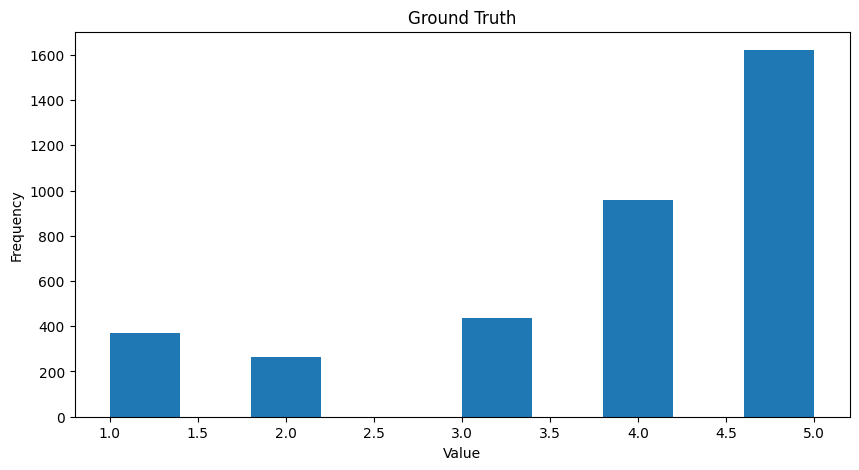

In [65]:
#what is the distrubution in ground truth scores like?
getHistogram(finaldf, 'ratingScore', 'Ground Truth')

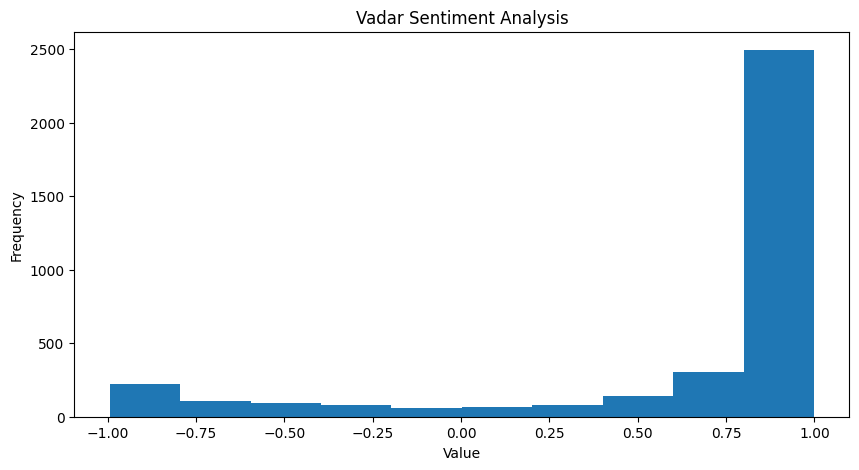

In [66]:
# what is the distrubtuion in vader scores like?
getHistogram(finaldf, 'vader', 'Vadar Sentiment Analysis')

The vader has higher frequency than that of ground truth. And both ground truth and vader have similar trend. This does not suprise me.

### (ii) Show a histogram of the number of reviews per hotel. Do you notice any specific trends or are no trends apparent?

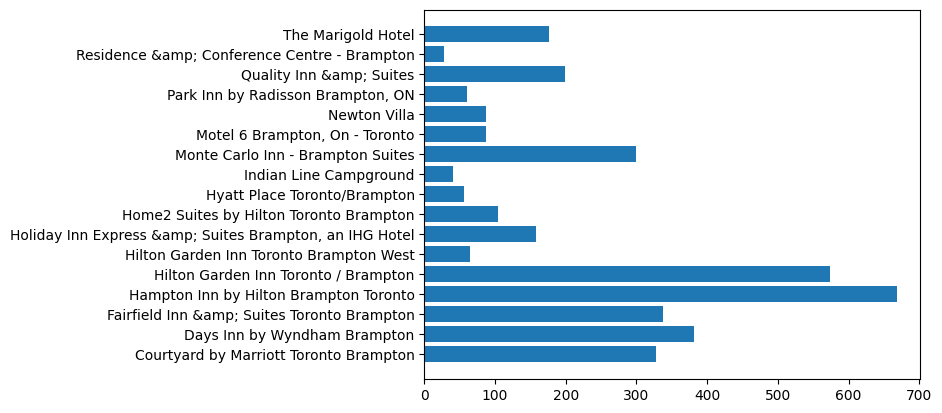

In [67]:
temp_df = finaldf[['reviewCol']].groupby(finaldf['hotelName']).agg(['count'])
plt.barh(temp_df.index, temp_df[('reviewCol', 'count')].values)
plt.show()

Different hotels have different numbers of reviews, with some having as few as 50 and others having more than 300. However, having a large number of reviews does not guarantee that a hotel will be among the best or worst rated. In fact, hotels with many reviews are less likely to be considered extreme in their ratings.

## (b) Boxplots

### (i) In two plots, one for ground truth star rating and one for Vader sentiment, show a plot of side-by-side boxplots of these scores for the top-5 ranked hotels according to star rating

In [68]:
def avg_rating_per_hotel(df):
    # average the scores over all hotels, you may need to provide additional filtering
    tempDf = df[['hotelName','vader','ratingScore','reviewCol']]
    tempDf.columns = ['hotelName','AverageVader', 'AverageRatingScore','n_reviews']
    tempDf = tempDf.groupby('hotelName').agg({'AverageVader':'mean', 'AverageRatingScore':'mean','n_reviews':'count'})
    return tempDf

In [69]:
avg_rating_df = avg_rating_per_hotel(finaldf)
avg_rating_df

,AverageVader,AverageRatingScore,n_reviews
hotelName,,,
Courtyard by Marriott Toronto Brampton,0.718041,3.981651,327
Days Inn by Wyndham Brampton,0.526215,3.590551,381
Fairfield Inn &amp; Suites Toronto Brampton,0.669936,3.840237,338
Hampton Inn by Hilton Brampton Toronto,0.815244,4.579341,668
Hilton Garden Inn Toronto / Brampton,0.762195,4.280977,573
Hilton Garden Inn Toronto Brampton West,0.618943,4.107692,65
"Holiday Inn Express &amp; Suites Brampton, an IHG Hotel",0.691894,3.898734,158
Home2 Suites by Hilton Toronto Brampton,0.665873,4.086538,104
Hyatt Place Toronto/Brampton,0.844682,4.482143,56


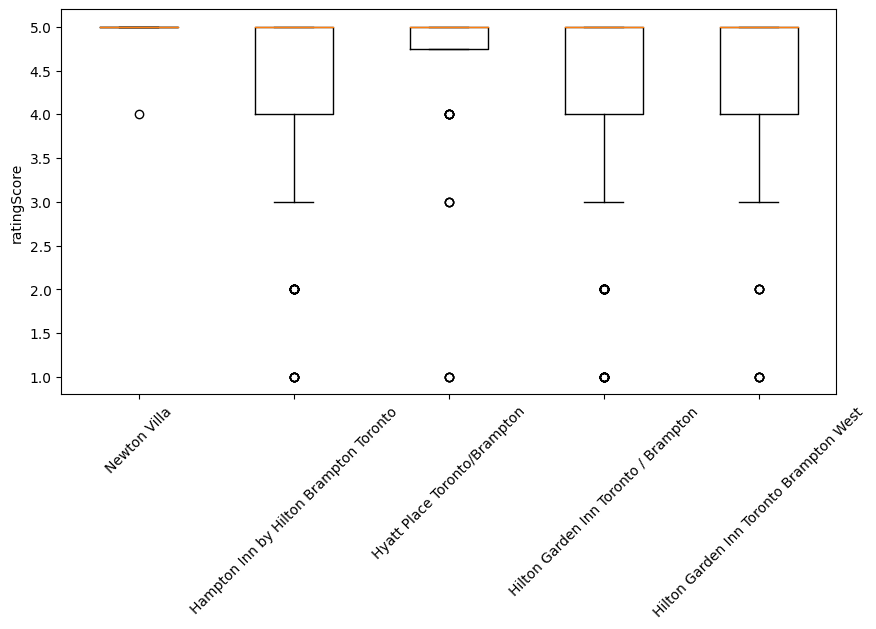

In [70]:
# how do the ratings compare for 5 hotels?
five_hotels = avg_rating_df.sort_values('AverageRatingScore', ascending=False)[:5]
five_hotels = five_hotels.index.values

hotel_list = []
for hotel in five_hotels:
  _hotel = finaldf.loc[finaldf['hotelName'] == hotel]['ratingScore']
  hotel_list.append(_hotel)


# multiple box plots on one figure
plt.figure(figsize=(10,5))
plt.boxplot(hotel_list)
plt.xticks(np.arange(1,6), five_hotels, rotation=45)
plt.ylabel('ratingScore')
plt.show()

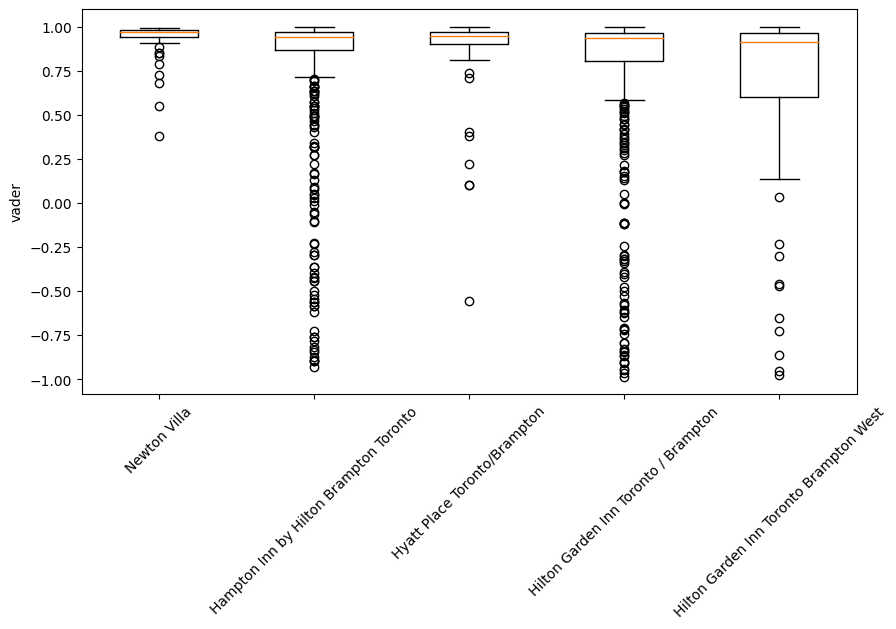

In [71]:
# how do the ratings compare for 5 hotels?
hotel_list = []
for hotel in five_hotels:
  _hotel = finaldf.loc[finaldf['hotelName'] == hotel]['vader']
  hotel_list.append(_hotel)


# multiple box plots on one figure
plt.figure(figsize=(10,5))
plt.boxplot(hotel_list)
plt.xticks(np.arange(1,6), five_hotels, rotation=45)
plt.ylabel('vader')
plt.show()

### (ii) Report the mean and variance of the ground truth and Vader sentiment scores for the top-5 ranked hotels according to star rating.

In [72]:
five_hotels

array(['Newton Villa', 'Hampton Inn by Hilton Brampton Toronto',
       'Hyatt Place Toronto/Brampton',
       'Hilton Garden Inn Toronto / Brampton',
       'Hilton Garden Inn Toronto Brampton West'], dtype=object)

In [73]:
def report_mean_var(hotel, measure):
    print('mean', measure, hotel, ':', finaldf[finaldf.hotelName == hotel][measure].mean())
    print('var', measure, hotel, ':',finaldf[finaldf.hotelName == hotel][measure].var())
    print('')

In [74]:
for hotel_name in five_hotels:
    report_mean_var(hotel_name, 'ratingScore')

mean ratingScore Newton Villa : 4.988505747126437
var ratingScore Newton Villa : 0.011494252873563211

mean ratingScore Hampton Inn by Hilton Brampton Toronto : 4.5793413173652695
var ratingScore Hampton Inn by Hilton Brampton Toronto : 0.6218814245571825

mean ratingScore Hyatt Place Toronto/Brampton : 4.482142857142857
var ratingScore Hyatt Place Toronto/Brampton : 1.2360389610389613

mean ratingScore Hilton Garden Inn Toronto / Brampton : 4.280977312390925
var ratingScore Hilton Garden Inn Toronto / Brampton : 0.9925920501836732

mean ratingScore Hilton Garden Inn Toronto Brampton West : 4.107692307692307
var ratingScore Hilton Garden Inn Toronto Brampton West : 1.628846153846154



In [75]:
for hotel_name in five_hotels:
    report_mean_var(hotel_name, 'vader')

mean vader Newton Villa : 0.9406114942528736
var vader Newton Villa : 0.008258769401229618

mean vader Hampton Inn by Hilton Brampton Toronto : 0.8152438622754491
var vader Hampton Inn by Hilton Brampton Toronto : 0.1303882820762149

mean vader Hyatt Place Toronto/Brampton : 0.8446821428571428
var vader Hyatt Place Toronto/Brampton : 0.08067635494805195

mean vader Hilton Garden Inn Toronto / Brampton : 0.762195462478185
var vader Hilton Garden Inn Toronto / Brampton : 0.1770241938604938

mean vader Hilton Garden Inn Toronto Brampton West : 0.6189430769230769
var vader Hilton Garden Inn Toronto Brampton West : 0.31108205186538457



### (iii) Which do you find more informative, the boxplots or the mean and variance, or are they equally informative? Why?

box plot, since visualisation is clear and easy for comparison

## (c) Scatterplots and heatmaps

### (i) Show both a scatterplot and heatmap of ground truth score (star rating) versus Vader sentiment score. Each review is a point on the scatterplot. Do you notice anything interesting? What does this tell you about star ratings vs. Vader sentiment scores?

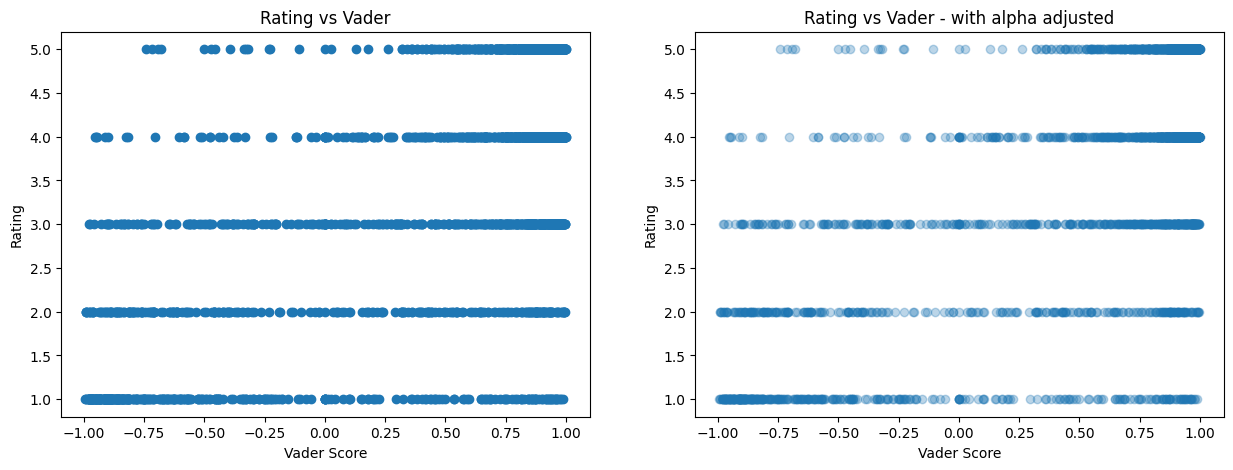

In [76]:
# scatter
fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)
rating_scores = finaldf['ratingScore'].values
vader_scores = finaldf['vader'].values

ax[0].plot(vader_scores, rating_scores,"o")
ax[1].plot(vader_scores, rating_scores,"o", alpha=0.3)

ax[0].set_title('Rating vs Vader')
ax[1].set_title('Rating vs Vader - with alpha adjusted')

for _ax in ax:
    _ax.set_ylabel('Rating')
    _ax.set_xlabel('Vader Score')

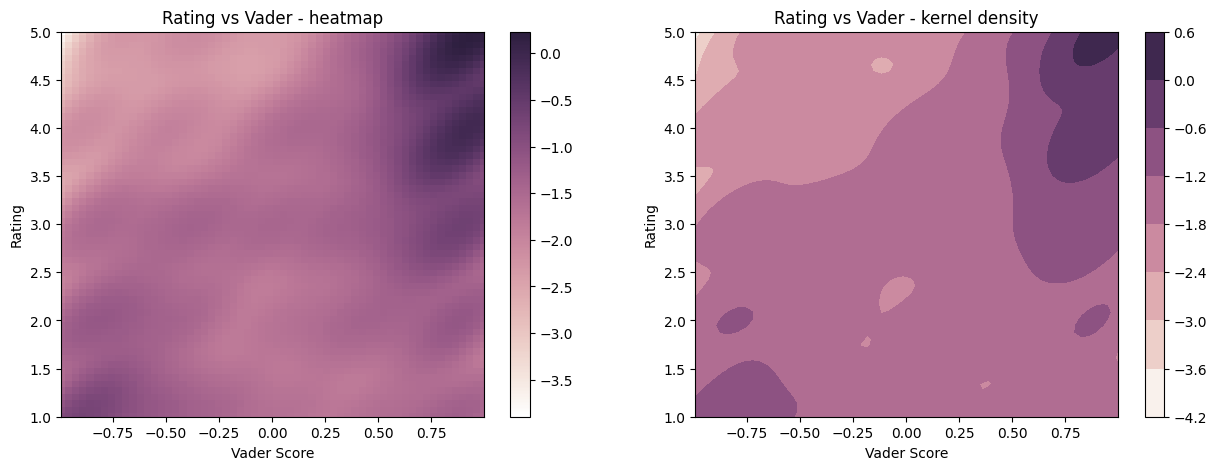

In [77]:
# heatmap
k = gaussian_kde(np.vstack([vader_scores, rating_scores]))
xi, yi = np.mgrid[vader_scores.min():vader_scores.max():vader_scores.size**0.5*1j,rating_scores.min():rating_scores.max():rating_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(vader_scores.min(), vader_scores.max())
ax1.set_ylim(rating_scores.min(), rating_scores.max())
ax2.set_xlim(vader_scores.min(), vader_scores.max())
ax2.set_ylim(rating_scores.min(), rating_scores.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('Rating vs Vader - heatmap')
ax2.set_title('Rating vs Vader - kernel density');

Both scattering and heatmap demonstrate that reveiws has high rating comes with high vader. In the right top of heatmap, the heatmap value is close to 0.6, which indicates that a majority of ground true ratings (4.5 - 5) are greater than 0 in vader analysis. So star ratings and vader sentiment scores are positive related.

### (ii) Show two scatterplots and two heatmaps of the length of reviews versus each of ground truth score and Vader sentiment score. Each review is a point on the scatterplot. Provide 2 comments on any trends, or lack of trends you see.

In [78]:
len_review = [len(finaldf['reviewCol'][i].split()) for i in range(len(finaldf['reviewCol']))]

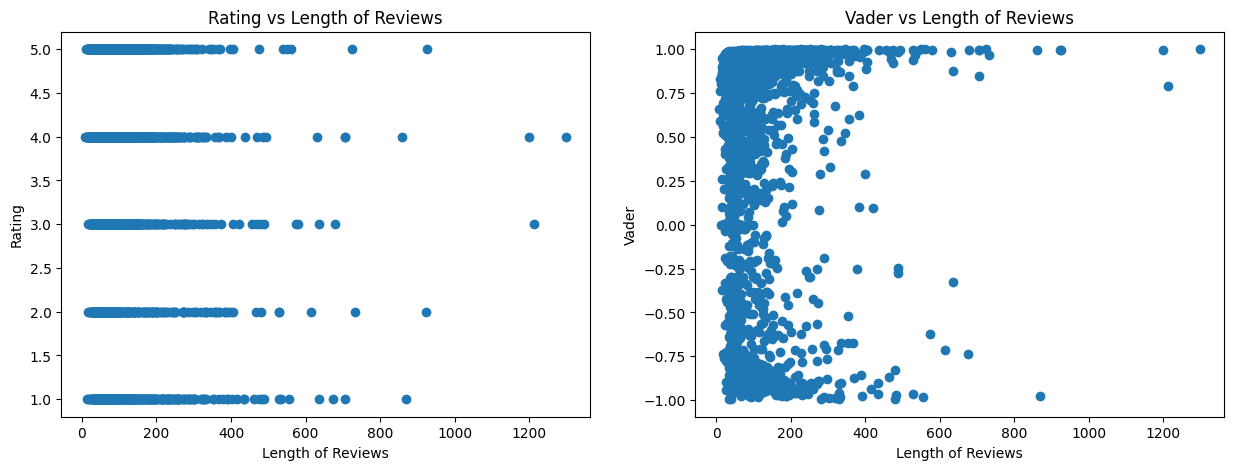

In [79]:
# scatter
fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)
rating_scores = finaldf['ratingScore'].values
vader = finaldf['vader'].values

ax[0].plot(len_review, rating_scores,"o")
ax[1].plot(len_review, vader,"o")

ax[0].set_title('Rating vs Length of Reviews')
ax[1].set_title('Vader vs Length of Reviews')

ax[0].set_ylabel('Rating')
ax[0].set_xlabel('Length of Reviews')

ax[1].set_ylabel('Vader')
ax[1].set_xlabel('Length of Reviews')

plt.show()

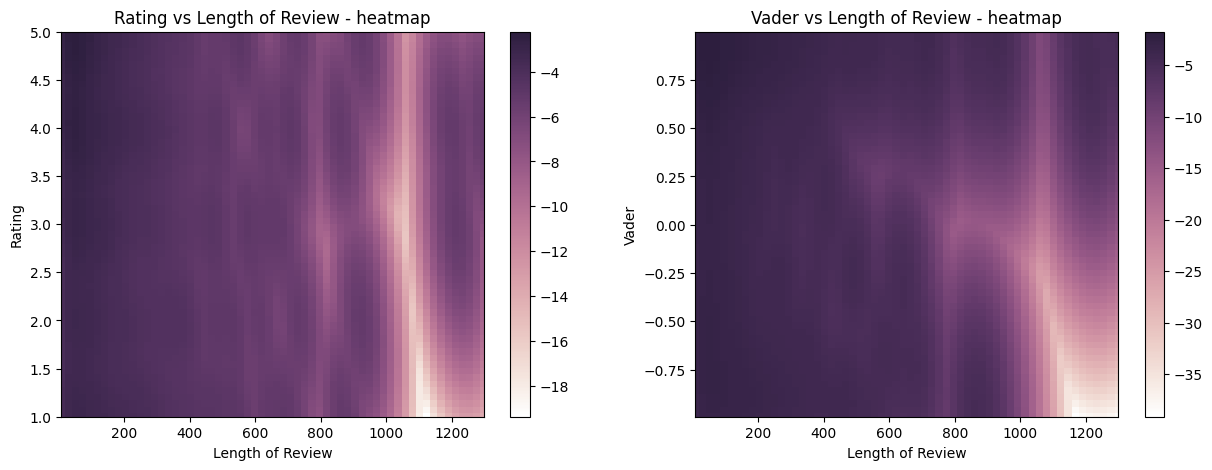

In [80]:
# heatmap
len_review = np.array(len_review)
ki = gaussian_kde(np.vstack([len_review, rating_scores]))
xi, yi = np.mgrid[len_review.min():len_review.max():len_review.size**0.5*1j,rating_scores.min():rating_scores.max():rating_scores.size**0.5*1j]
zi = ki(np.vstack([xi.flatten(), yi.flatten()]))

kii = gaussian_kde(np.vstack([len_review, vader]))
xii, yii = np.mgrid[len_review.min():len_review.max():len_review.size**0.5*1j,vader.min():vader.max():vader.size**0.5*1j]
zii = kii(np.vstack([xii.flatten(), yii.flatten()]))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.pcolormesh(xii, yii, np.log10(zii.reshape(xii.shape)), cmap=cmap)

ax1.set_xlim(len_review.min(), len_review.max())
ax1.set_ylim(rating_scores.min(), rating_scores.max())
ax2.set_xlim(len_review.min(), len_review.max())
ax2.set_ylim(vader.min(), vader.max())

ax1.set_xlabel('Length of Review')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Length of Review')
ax2.set_ylabel('Vader')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('Rating vs Length of Review - heatmap')
ax2.set_title('Vader vs Length of Review - heatmap')
plt.show()

Most of review has less than 600 words. From vader scatter pltos, 1 and -1 vader has longer reviews. From heatmaps, rating and vader have similar trend.

### (iii) Show two scatterplots of the number of reviews per hotel versus each of average ground truth score and average Vader sentiment score. In this case, each hotel is a single point on the scatterplot. Provide 2 comments on any trends, or lack of trends you see.

In [81]:
hotel_review_cnt = finaldf.hotelName.value_counts()
hotel_review_cnt

Hampton Inn by Hilton Brampton Toronto                     668
Hilton Garden Inn Toronto / Brampton                       573
Days Inn by Wyndham Brampton                               381
Fairfield Inn &amp; Suites Toronto Brampton                338
Courtyard by Marriott Toronto Brampton                     327
Monte Carlo Inn - Brampton Suites                          300
Quality Inn &amp; Suites                                   199
The Marigold Hotel                                         176
Holiday Inn Express &amp; Suites Brampton, an IHG Hotel    158
Home2 Suites by Hilton Toronto Brampton                    104
Newton Villa                                                87
Motel 6 Brampton, On - Toronto                              87
Hilton Garden Inn Toronto Brampton West                     65
Park Inn by Radisson Brampton, ON                           60
Hyatt Place Toronto/Brampton                                56
Indian Line Campground                                 

In [82]:
avg_score_df = finaldf[['hotelName','groundTruth','ratingScore','vader']].groupby('hotelName', as_index=True).mean()
avg_score_df

,ratingScore,vader
hotelName,,
Courtyard by Marriott Toronto Brampton,3.981651,0.718041
Days Inn by Wyndham Brampton,3.590551,0.526215
Fairfield Inn &amp; Suites Toronto Brampton,3.840237,0.669936
Hampton Inn by Hilton Brampton Toronto,4.579341,0.815244
Hilton Garden Inn Toronto / Brampton,4.280977,0.762195
Hilton Garden Inn Toronto Brampton West,4.107692,0.618943
"Holiday Inn Express &amp; Suites Brampton, an IHG Hotel",3.898734,0.691894
Home2 Suites by Hilton Toronto Brampton,4.086538,0.665873
Hyatt Place Toronto/Brampton,4.482143,0.844682


In [83]:
avg_gt_score = [avg_score_df.loc[hotel_review_cnt.index[i]]['ratingScore'] for i in range(len(hotel_review_cnt.index))]
avg_gt_score

[4.5793413173652695,
 4.280977312390925,
 3.590551181102362,
 3.8402366863905324,
 3.981651376146789,
 3.3833333333333333,
 3.170854271356784,
 2.3920454545454546,
 3.8987341772151898,
 4.086538461538462,
 4.988505747126437,
 2.2413793103448274,
 4.107692307692307,
 3.1,
 4.482142857142857,
 2.902439024390244,
 3.5]

In [84]:
avg_vader_score = [avg_score_df.loc[hotel_review_cnt.index[i]]['vader'] for i in range(len(hotel_review_cnt.index))]
avg_vader_score

[0.8152438622754491,
 0.762195462478185,
 0.5262154855643044,
 0.6699357988165681,
 0.7180406727828745,
 0.5167756666666666,
 0.4838824120603015,
 0.12056761363636363,
 0.6918943037974683,
 0.665873076923077,
 0.9406114942528736,
 0.11044597701149426,
 0.6189430769230769,
 0.25441166666666665,
 0.8446821428571428,
 0.26402195121951216,
 0.6355464285714286]

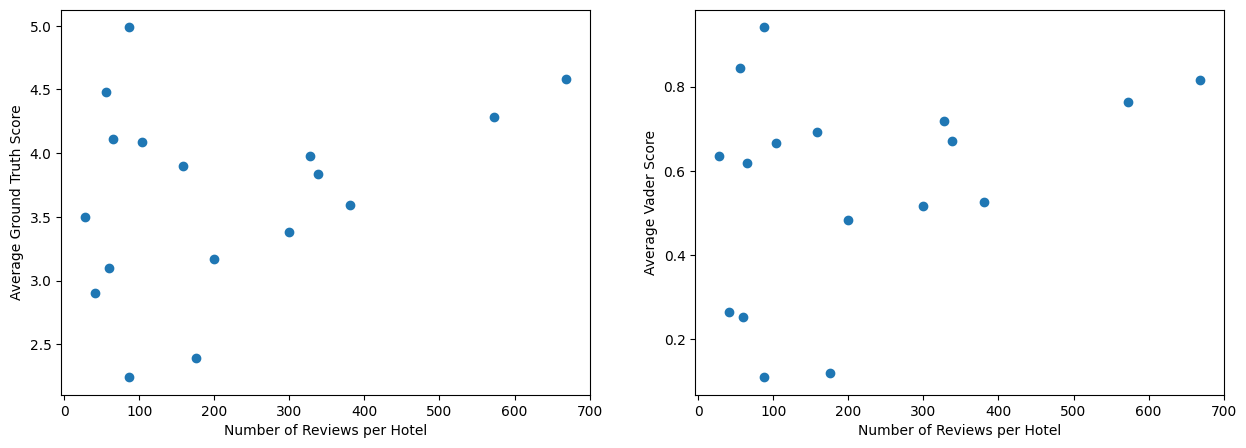

In [85]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hotel_review_cnt, avg_gt_score, 'o')
plt.ylabel('Average Ground Truth Score')
plt.xlabel('Number of Reviews per Hotel')

plt.subplot(1,2,2)
plt.plot(hotel_review_cnt, avg_vader_score, 'o')
plt.ylabel('Average Vader Score')
plt.xlabel('Number of Reviews per Hotel')
plt.show()

Ground truth and vader have similar trends. But hotels with around 200 reviews seem to have more ratings

## (d) Location-based patterns

Use folium2 and the reported location data to visualize the location of the hotels on a map.
Adjust the labels to reflect their average ground truth sentiment values. Does it appear as
though there are any visible relations between location and reviews? Are there are any areas
you would recommend staying or avoiding? Note: Save a screen shot of your map and
preview that image in your notebook. If not, the map will not render nicely in GitHub.

In [86]:
def make_address(row):
    # individual columns need to be combined
    return row['streetAddress']+", "+row['City']+", "+row['Province']

In [87]:
hotelDf.City = 'Brampton'

In [88]:
# Need the location for each hotel in a format the tool can handle

geo_rating_df = avg_rating_df\
                         .join(hotelDf.groupby('hotelName')\
                         .agg({'streetAddress':'max','City':'max','Province':'max','postalCode':'max'}))
geo_rating_df['formed_address'] = geo_rating_df.apply(make_address , axis=1)

geo_rating_df


,AverageVader,AverageRatingScore,n_reviews,streetAddress,City,Province,postalCode,formed_address
hotelName,,,,,,,,
Courtyard by Marriott Toronto Brampton,0.718041,3.981651,327,90 Biscayne Cres,Brampton,Ontario,L6W 4S1,"90 Biscayne Cres, Brampton, Ontario"
Days Inn by Wyndham Brampton,0.526215,3.590551,381,260 Queen St E,Brampton,Ontario,L6V 1B9,"260 Queen St E, Brampton, Ontario"
Fairfield Inn &amp; Suites Toronto Brampton,0.669936,3.840237,338,150 Westcreek Blvd,Brampton,Ontario,L6T 5V7,"150 Westcreek Blvd, Brampton, Ontario"
Hampton Inn by Hilton Brampton Toronto,0.815244,4.579341,668,8710 The Gore Rd,Brampton,Ontario,L6P 0B1,"8710 The Gore Rd, Brampton, Ontario"
Hilton Garden Inn Toronto / Brampton,0.762195,4.280977,573,2648 Steeles Ave E,Brampton,Ontario,L6S 6J9,"2648 Steeles Ave E, Brampton, Ontario"
Hilton Garden Inn Toronto Brampton West,0.618943,4.107692,65,200 Steelwell Road,Brampton,Ontario,L6T 5T3,"200 Steelwell Road, Brampton, Ontario"
"Holiday Inn Express &amp; Suites Brampton, an IHG Hotel",0.691894,3.898734,158,10 Nevets Rd,Brampton,Ontario,L6T 5T2,"10 Nevets Rd, Brampton, Ontario"
Home2 Suites by Hilton Toronto Brampton,0.665873,4.086538,104,200 Steelwell Road,Brampton,Ontario,L6T 5T3,"200 Steelwell Road, Brampton, Ontario"
Hyatt Place Toronto/Brampton,0.844682,4.482143,56,3455 Queen Street East,Brampton,Ontario,L0P 1N0,"3455 Queen Street East, Brampton, Ontario"


In [89]:
# 0 - need to give the tool a generic name.
locator = Photon(user_agent='myGeocoder')
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2 - form the location string
geo_rating_df['location'] = geo_rating_df['formed_address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
geo_rating_df['point'] = geo_rating_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
geo_rating_df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(geo_rating_df['point'].tolist(), index=geo_rating_df.index)

geo_rating_df

,AverageVader,AverageRatingScore,n_reviews,streetAddress,City,Province,postalCode,formed_address,location,point,latitude,longitude,altitude
hotelName,,,,,,,,,,,,,
Courtyard by Marriott Toronto Brampton,0.718041,3.981651,327,90 Biscayne Cres,Brampton,Ontario,L6W 4S1,"90 Biscayne Cres, Brampton, Ontario","(Courtyard by Marriott, 90, Biscayne Crescent,...","(43.6816697, -79.71358084502798, 0.0)",43.681670,-79.713581,0.0
Days Inn by Wyndham Brampton,0.526215,3.590551,381,260 Queen St E,Brampton,Ontario,L6V 1B9,"260 Queen St E, Brampton, Ontario","(260, Queen Street East, L6V 1B9, Queen Street...","(43.700943641697435, -79.74319279218663, 0.0)",43.700944,-79.743193,0.0
Fairfield Inn &amp; Suites Toronto Brampton,0.669936,3.840237,338,150 Westcreek Blvd,Brampton,Ontario,L6T 5V7,"150 Westcreek Blvd, Brampton, Ontario",None,None,NaN,NaN,NaN
Hampton Inn by Hilton Brampton Toronto,0.815244,4.579341,668,8710 The Gore Rd,Brampton,Ontario,L6P 0B1,"8710 The Gore Rd, Brampton, Ontario","(8710, Gordon Road, N0M 2N0, Gordon Road, Lamb...","(43.15219706756757, -81.85752522635136, 0.0)",43.152197,-81.857525,0.0
Hilton Garden Inn Toronto / Brampton,0.762195,4.280977,573,2648 Steeles Ave E,Brampton,Ontario,L6S 6J9,"2648 Steeles Ave E, Brampton, Ontario","(2648, Countryside Drive, L6R 0E1, Countryside...","(43.7807438, -79.7525909, 0.0)",43.780744,-79.752591,0.0
Hilton Garden Inn Toronto Brampton West,0.618943,4.107692,65,200 Steelwell Road,Brampton,Ontario,L6T 5T3,"200 Steelwell Road, Brampton, Ontario","(200, Steelwell Road, L6T 5P3, Steelwell Road,...","(43.687248570484556, -79.70698513876754, 0.0)",43.687249,-79.706985,0.0
"Holiday Inn Express &amp; Suites Brampton, an IHG Hotel",0.691894,3.898734,158,10 Nevets Rd,Brampton,Ontario,L6T 5T2,"10 Nevets Rd, Brampton, Ontario","(Holiday Inn Express & Suites Brampton, 10, Ne...","(43.741483, -79.6923274146225, 0.0)",43.741483,-79.692327,0.0
Home2 Suites by Hilton Toronto Brampton,0.665873,4.086538,104,200 Steelwell Road,Brampton,Ontario,L6T 5T3,"200 Steelwell Road, Brampton, Ontario","(200, Steelwell Road, L6T 5P3, Steelwell Road,...","(43.687248570484556, -79.70698513876754, 0.0)",43.687249,-79.706985,0.0
Hyatt Place Toronto/Brampton,0.844682,4.482143,56,3455 Queen Street East,Brampton,Ontario,L0P 1N0,"3455 Queen Street East, Brampton, Ontario","(Hyatt Place Toronto/Brampton, 3455, Queen Str...","(43.75178485, -79.68541277872609, 0.0)",43.751785,-79.685413,0.0


In [90]:
map1 = folium.Map(
    location=[43.681670, -79.713581], # <- this will need to be set based on your own hotels
    tiles='cartodbpositron',
    zoom_start=10,
)

geo_rating_df.dropna().apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]], color='#d7191c').add_to(map1), axis=1)

map1.save("index.html")

Screenshot

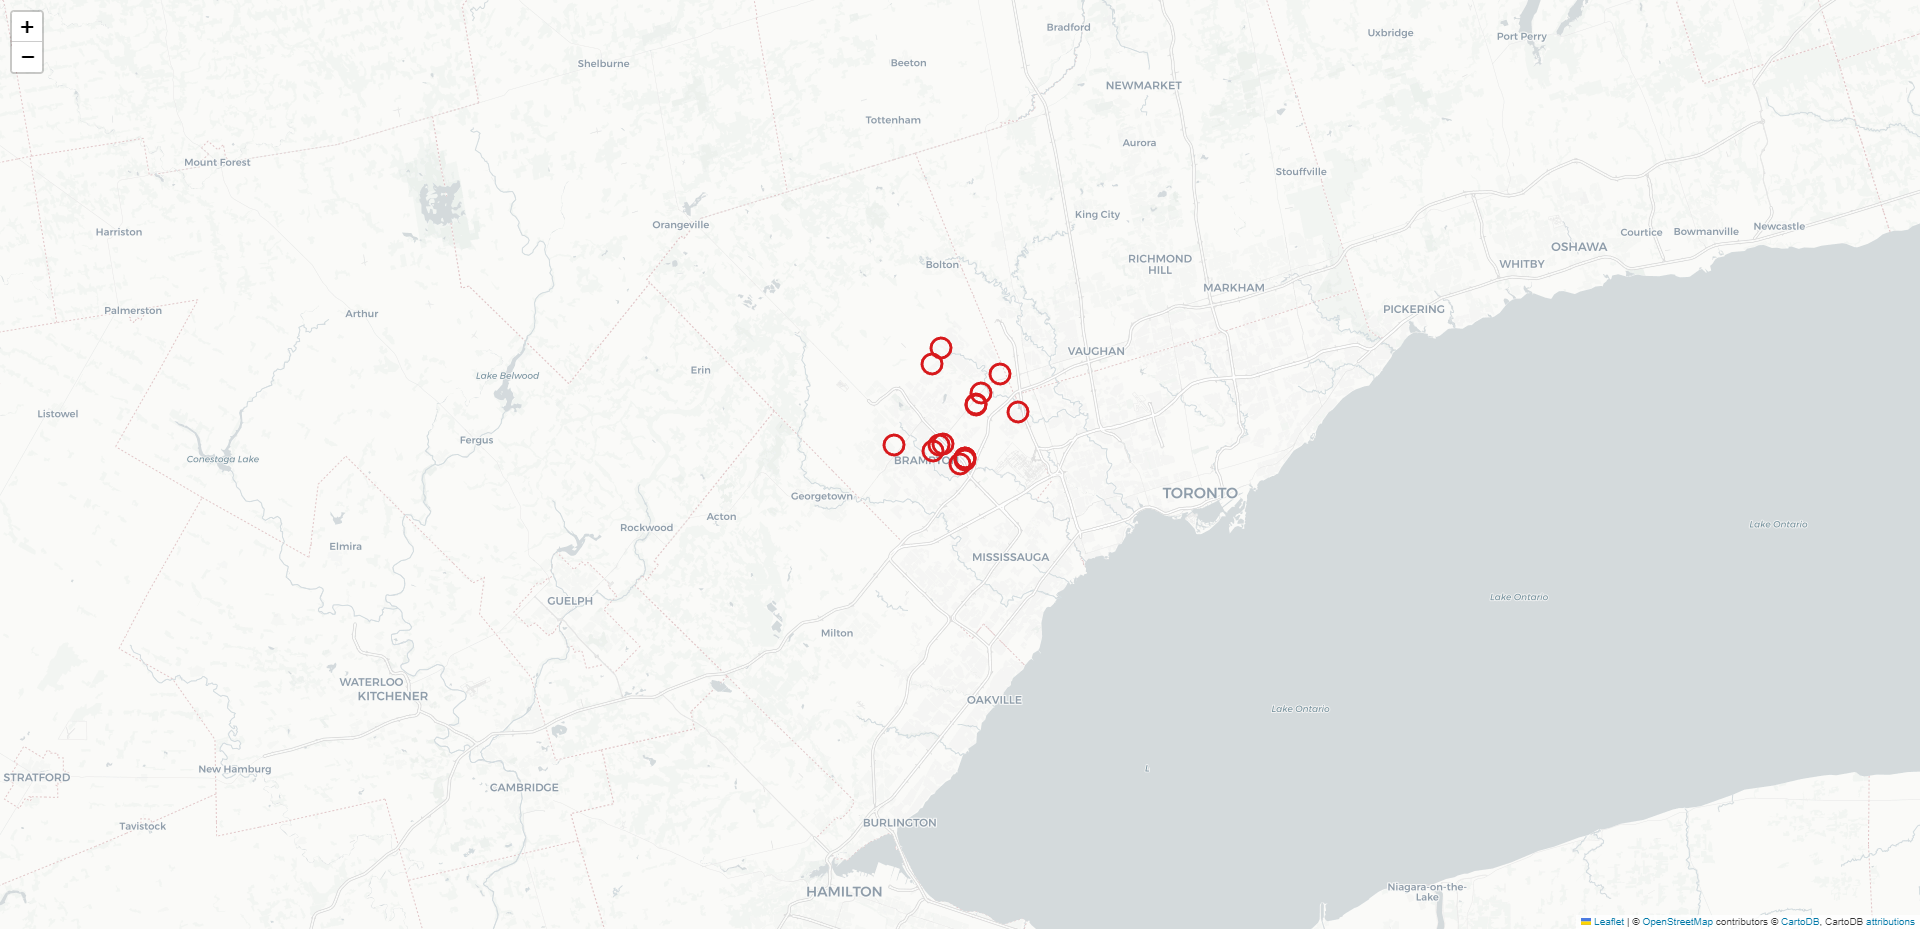

## (e) Temporal analysis

Using a sample of 6 hotels (2 highly rated, 2 lowly rated, and 2 mediocre) with a large number
of reviews complete the following:

### (i) Plot the rolling average score as a function of time. Comment on if the highly rated and lowly rated hotels’ ratings were consistent or did they fluctuate?

In [91]:
avg_rating_df

,AverageVader,AverageRatingScore,n_reviews
hotelName,,,
Courtyard by Marriott Toronto Brampton,0.718041,3.981651,327
Days Inn by Wyndham Brampton,0.526215,3.590551,381
Fairfield Inn &amp; Suites Toronto Brampton,0.669936,3.840237,338
Hampton Inn by Hilton Brampton Toronto,0.815244,4.579341,668
Hilton Garden Inn Toronto / Brampton,0.762195,4.280977,573
Hilton Garden Inn Toronto Brampton West,0.618943,4.107692,65
"Holiday Inn Express &amp; Suites Brampton, an IHG Hotel",0.691894,3.898734,158
Home2 Suites by Hilton Toronto Brampton,0.665873,4.086538,104
Hyatt Place Toronto/Brampton,0.844682,4.482143,56


In [92]:
sample_6_hotel = ['Hampton Inn by Hilton Brampton Toronto', 'Hilton Garden Inn Toronto / Brampton',
                  'Monte Carlo Inn - Brampton Suites', 'Fairfield Inn &amp; Suites Toronto Brampton',
                  'The Marigold Hotel', 'Quality Inn &amp; Suites']

In [93]:
hotelDf.drop(hotelDf[hotelDf.date_stamp == '4 weeks ago'].index, inplace=True)
hotelDf.drop(hotelDf[hotelDf.date_stamp == '2 weeks ago'].index, inplace=True)
hotelDf.drop(hotelDf[hotelDf.date_stamp == '3 weeks ago'].index, inplace=True)

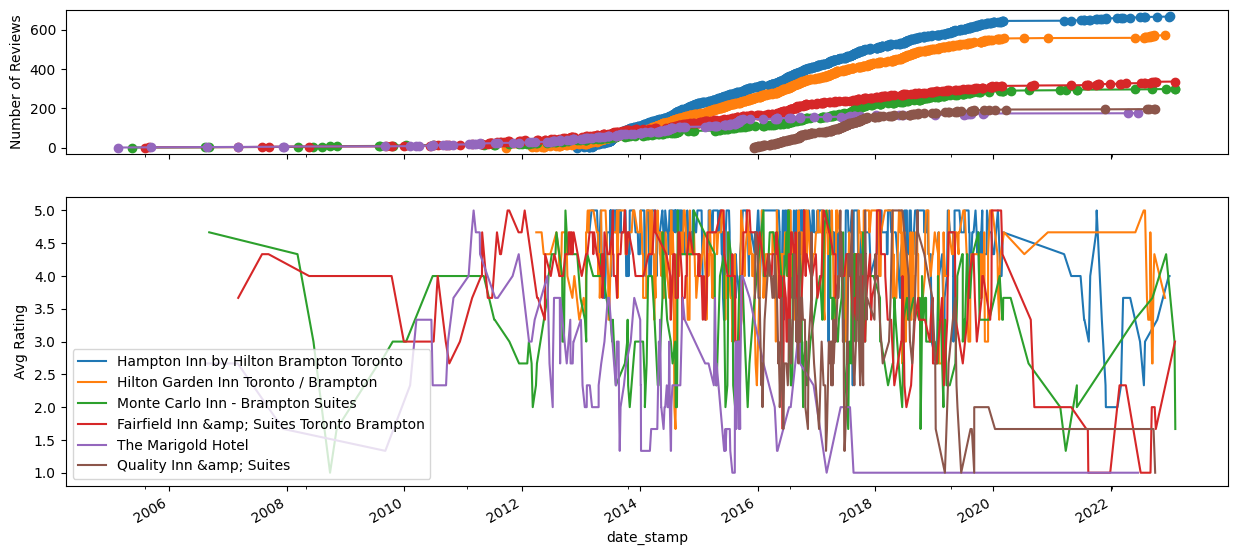

In [94]:
# It can be useful to see when reviews were being made and how the ratings changed using a running mean
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in sample_6_hotel: 
    _df = hotelDf[hotelDf['hotelName']==hotel].set_index('date_stamp')
    _df.index = pd.to_datetime(_df.index)
    _df = _df.sort_index()
    _df['count'] = 1
    _df['count'].cumsum().plot(ax=ax[0],label=hotel, marker='o')
    _df['ratingScore'].rolling(3).mean().plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

the highly rated and lowly rated hotels’ ratings fluctuate

### (ii) Determine how you can plot the rate of reviews (i.e., the number of reviews in a fixed time period) for each hotel over time. After showing this plot, comment on the trends you observe and provide a hypothesis to explain these observed trends.

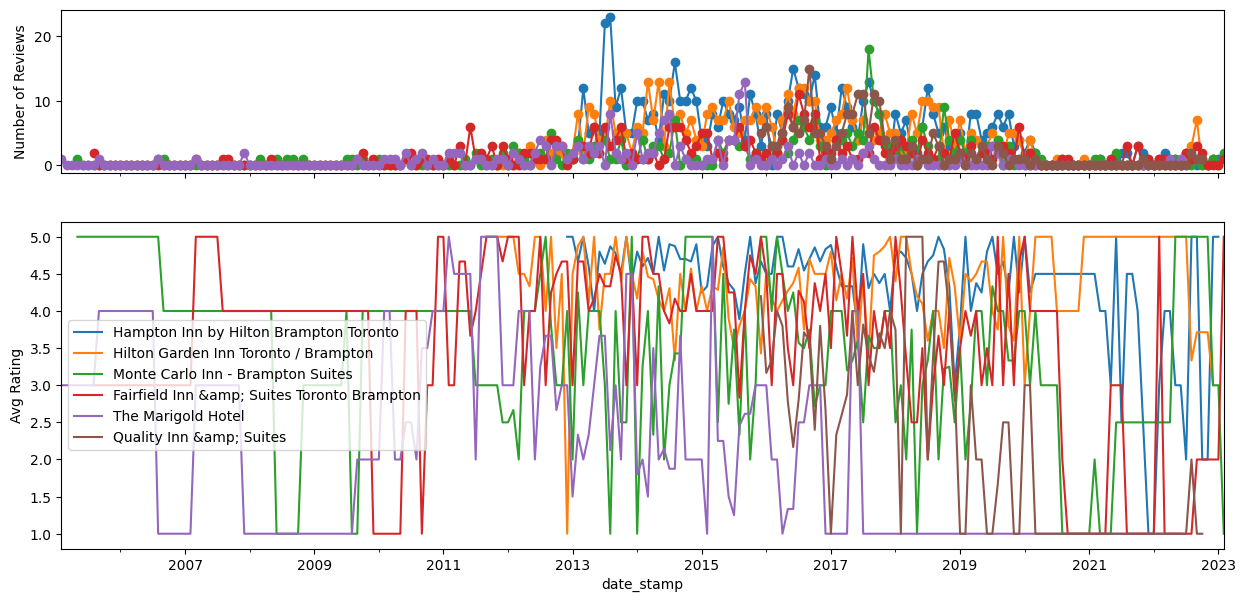

In [95]:
# It can be useful to see when reviews were being made and how the ratings changed
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in sample_6_hotel: 
  _df = hotelDf[hotelDf['hotelName']==hotel].set_index('date_stamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df_monthly = _df.groupby(pd.Grouper(freq='M')).agg({'count':'sum','ratingScore':'mean'})
  _df_monthly['ratingScore'] = _df_monthly['ratingScore'].fillna(method='ffill') # hold the last rating constant in months with no reviews
  _df_monthly['count'].plot(ax=ax[0],label=hotel, marker='o')
  _df_monthly['ratingScore'].plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

2 high rated hotels had high average ratings before covid19, 2 average rated hotels started with high average ratings but quickly dropped to 3 stars, 2 low rated hotels started with average average ratings and then quickly dropped to 3 stars.

That's because new hotels start out with high ratings, then ratings will drop to a plateau, and then the pandemic in 2019 nearly shuts down all hotels because there are no travelers